In [294]:
import math
import random
import matplotlib.pyplot as plt

In [295]:
def transpose(x):
    return [*map(list,zip(*x))]

def tensor(x,y):
    return [[row*col for col in y] for row in x]

def vecPlus(x,y):
    return [a+b for a,b in zip(x,y)]

def vecMin(x,y):
    return [a-b for a,b in zip(x,y)]
    
def vecProd(x,y):
    return [a*b for a,b in zip(x,y)]
    
def vecDiv(x,y):
    return [a/b for a,b in zip(x,y)]

In [326]:
def sigmoid(x):
    return [math.exp(y)/(math.exp(y)+1) for y in x]

def sigmoidDiff(x):
    return [math.exp(y)/(math.exp(y)+1)**2 for y in x]

def feed(inputs, weights):
    return [sum(vecProd(inputs,row)) for row in transpose(weights)]

def target(x):
    y = random.choices(range(x), k=1)[0]
    return [(1 if (i == y) else 0) for i in range(x)]

def err(actual, pred):
    return vecProd(actual,[math.log(p) for p in pred])

def errDiff(actual, pred):
    e_s = [i-0.5 for i in vecDiv(vecProd(actual,sigmoid(pred)),sigmoid(pred))]
    s_o = sigmoidDiff(pred)
    e_o = vecProd(e_s,s_o)
    return tensor(inp,e_o)

def optimizer():
    return

inp = [1.0 for _ in range(4)]
outputs = 4
targ = target(outputs)
wgt = [[(a+b)*0.01 for b in range(outputs)] for a in range(len(inp))]
lr = 1

[0, 1, 0, 0]


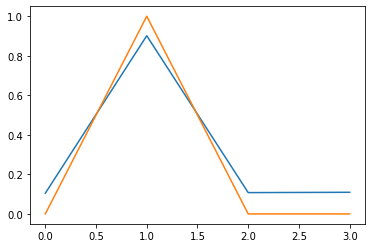

In [329]:
for _ in range(2):
    wgt = [[u for u in [a+b*lr for a,b in zip(w,j)]] for w,j in zip(wgt,errDiff(targ,feed(inp,wgt)))]
results = transpose([sigmoid(feed(inp,wgt)),targ])
plt.plot(results)
print(targ)